### Python金融时间序列数据回归分析实战（基于Jupyter Notebook）
## <center>实证：投资者恐慌指数 VIX 对美国标普500指数走势的影响</center>
### <center>策略制定及验证：张君颖  ； 报告日期：2020.10.13</center>
<font color=blue><center>本报告不构成投资建议，转载需注明作者且不得删改</center></font>
<font color=blue><center>作者邮箱：zhang.jun.ying@outlook.com</center></font>

### 第一步：导入需要使用的python库，并进行数据描述

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
%matplotlib inline

### 下载VIX指数、SPX500指数数据至本地，保存成CSV格式，使用pandas读取
由于VIX指数在国内打不开网页，所以笔者只能找到GitHub上其他分析师分享的数据  

数据采样时间：2010.1.4~2018.6.29

In [2]:
raw = pd.read_csv('C:/Users/lotbear/Desktop/financial-regression-analysis/VIX-SPX500-data.csv',
                  index_col=0, parse_dates=True)

In [3]:
data = raw[['.SPX', '.VIX']].dropna()

### 打印/查看数据 最后5行

In [4]:
data.tail()

,.SPX,.VIX
Date,,
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91
2018-06-28,2716.31,16.85
2018-06-29,2718.37,16.09


### 查看数据信息
起止日期：2010.1.4~2018.6.29    
数据量：2138个交易日

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
 1   .VIX    2138 non-null   float64
dtypes: float64(2)
memory usage: 50.1 KB


### 数据绘制
1.分开绘制

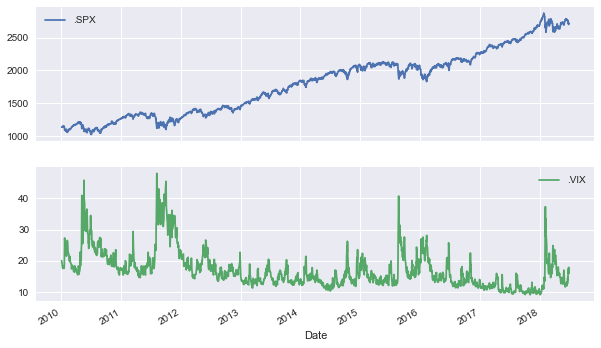

In [6]:
data.plot(subplots=True, figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_08.png');

2. 合并绘制

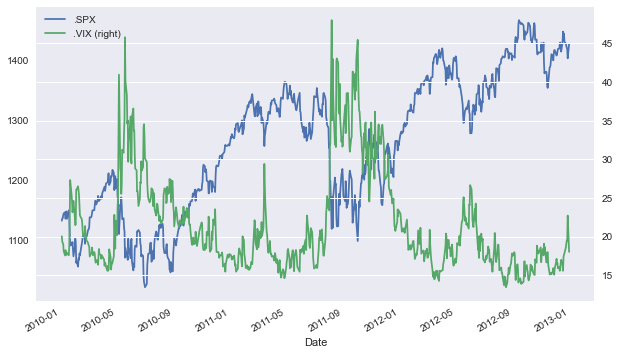

In [7]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_09.png');

### 第二步：
### 利用对数回报率（Log Returns）r%进行时间序列建模

回报率 return% = t时刻指数/t-1时刻指数，然后取自然数 e 的对数log(e)  

注：回报率 r% 取自然数e的对数，目的主要是为了<font color=red>取得平稳 且 正态分布的数据</font>（相当于将时间序列数据预处理）    

另外，自然数 **e<sup>r</sup>** 的经济学意义为连续复利

In [8]:
# numpy 中 log 默认为 In，即自然数 e 的对数
rets = np.log(data/data.shift(1)) 

In [9]:
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [10]:
rets.dropna(inplace=True)

### return%时间序列绘图，查看是否平稳

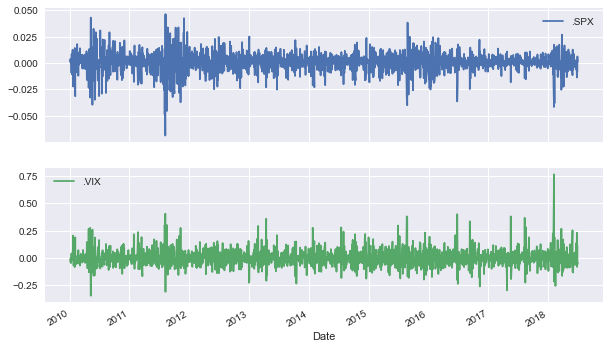

In [11]:
rets.plot(subplots=True, figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_10.png');

### 检查return%时间序列数据是否正态分布

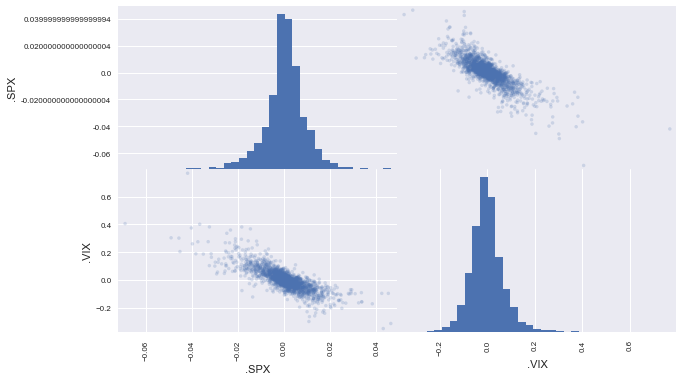

In [12]:
pd.plotting.scatter_matrix(rets,  
                           alpha=0.2,  
                           diagonal='hist',  
                           hist_kwds={'bins': 35},  
                           figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_11.png');

### OLS Regression 最小二乘法线性回归拟合SPX500的return%

In [13]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)  

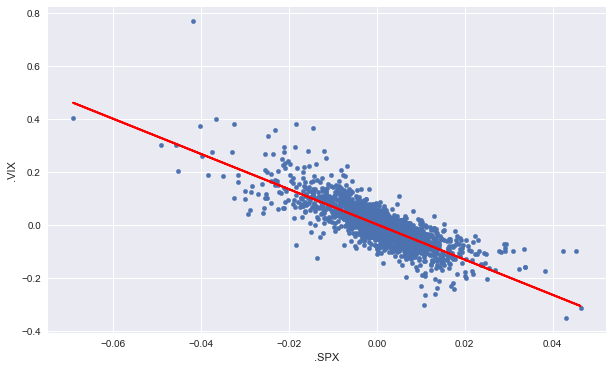

In [14]:
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))  
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);  
# plt.savefig('../../images/ch08/fts_12.png');

### 查看 VIX 恐慌指数与 SPX500 指数的相关性矩阵

数据显示，VIX 恐慌指数与 SPX500 呈现负相关，且负相关系数为 -0.8

该结论符合大众认知：即当市场恐慌增强，股指走低

In [15]:
rets.corr()  

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


### 查看相关系数的滚动（窗口期为一年252个交易日）

其中，红线代表相关系数的均值-0.804382

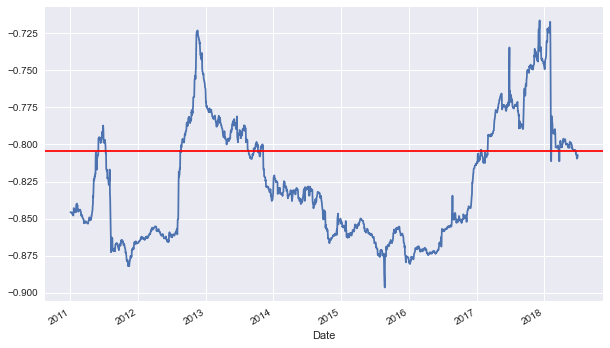

In [16]:
ax = rets['.SPX'].rolling(window=252).corr(
                  rets['.VIX']).plot(figsize=(10, 6))  
ax.axhline(rets.corr().iloc[0, 1], c='r');  
# plt.savefig('../../images/ch08/fts_13.png');

### 小结：

投资者恐慌指数 VIX 为另类数据。    

随着技术的发展，获取大数据的成本不断降低，但历史价格等传统数据已完全无法满足投资者需求，可挖掘Alpha已基本消失。      

因此尝试从另类数据（Alternative Data）中提取交易信号逐步成为业界主流趋势。   

另类数据如资讯情绪，产业链及供应链数据等已被广泛纳入量化策略。

在海外市场，量化投资领域对另类数据的应用在过去两三年内已实现阶段性发展。    

未来几年，另类数据在中国量化机构的广泛应用将是必然的。